created by Claude
saving plot results as a pdf file

Absolutely! I'll modify the code to save the plot as a PDF file. Here's the updated version:Perfect! Now the code will automatically save your plot as a high-quality PDF file. Here are the key changes:

## New Features:

1. **Automatic PDF saving**: The plot is saved as PDF by default
2. **High quality**: 300 DPI resolution for publication-quality figures
3. **Auto-generated filename**: Creates PDF filename based on your data file name
4. **Custom filename option**: You can specify your own PDF filename if needed

## Usage Examples:

**Basic usage (saves PDF automatically):**
```python
data_dict = plot_voltage_sweep_data()
```
This will create: `data_IV_plot.pdf`

**Custom PDF filename:**
```python
data_dict = plot_voltage_sweep_data(pdf_filename="my_measurement_results.pdf")
```

**Don't save PDF (just display):**
```python
data_dict = plot_voltage_sweep_data(save_pdf=False)
```

## Output Files:

- **Main plot**: `data_IV_plot.pdf`
- **3D plot** (if enabled): `data_IVentu-Ventd-0Vsd_tr350_77K_3D_plot.pdf`

## PDF Features:

- **High resolution**: 300 DPI for crisp, publication-ready figures
- **Vector format**: PDF preserves quality at any zoom level
- **Tight bounding box**: No unnecessary white space around the plot
- **Embedded fonts**: Text will display correctly on any system

The PDF will be saved in the same directory as your script, and you'll see a confirmation message when it's saved successfully!

Creating 3D plot with custom view angle...
Data loaded successfully. Shape: (1000, 3)
Current view: Elevation = 45°, Azimuth = 60°
3D plot saved as: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_elev45_azim60.pdf


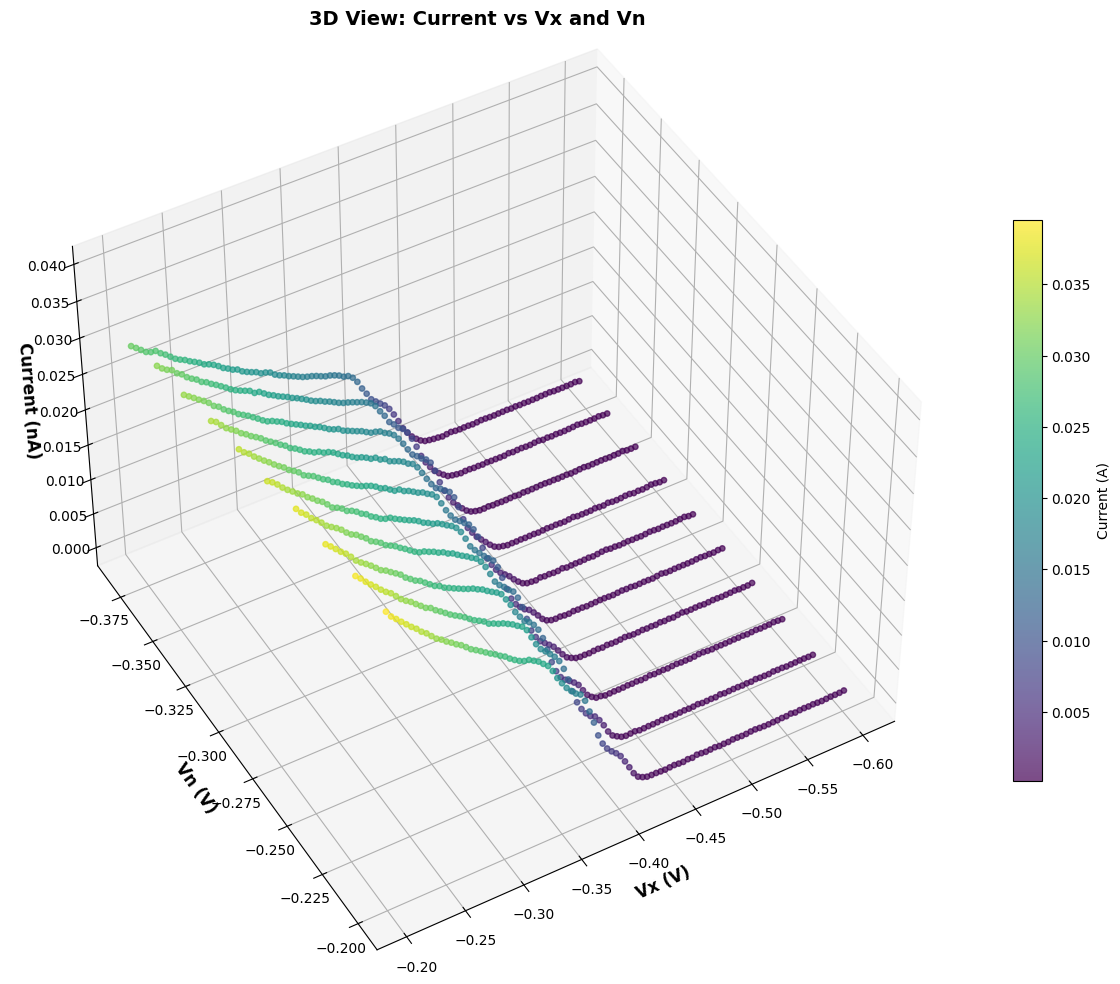


Creating multiple preset views...
Data loaded successfully. Shape: (1000, 3)
Current view: Elevation = 30°, Azimuth = 45°


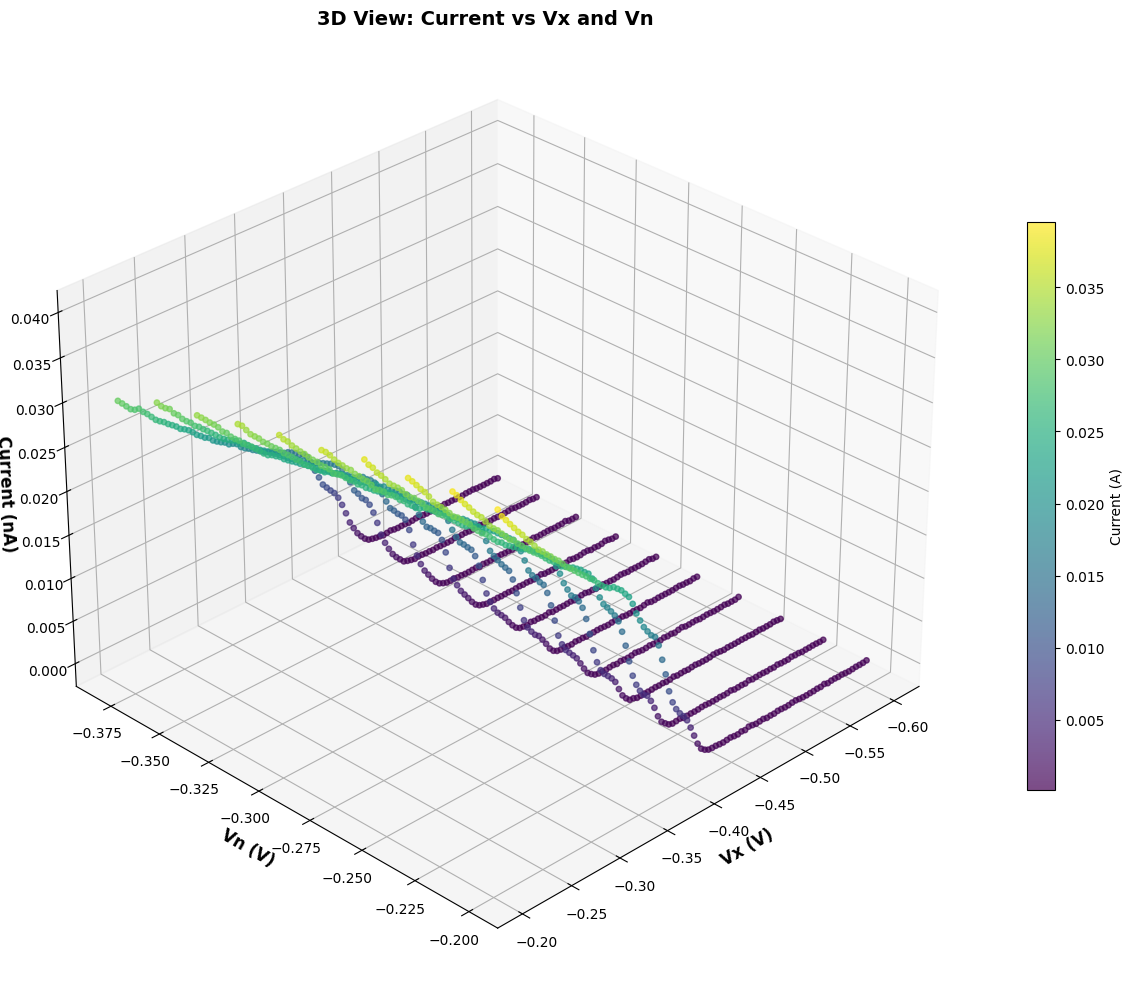

Saved view: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_default.pdf
Saved view: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_high_angle.pdf
Saved view: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_low_angle.pdf
Saved view: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_front_view.pdf
Saved view: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_side_view.pdf
Saved view: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_top_view.pdf
Saved view: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_3D_edge_view.pdf

Creating interactive 3D plot...
Interactive plot created. Click and drag to rotate the view!
Use mouse wheel to zoom in/out


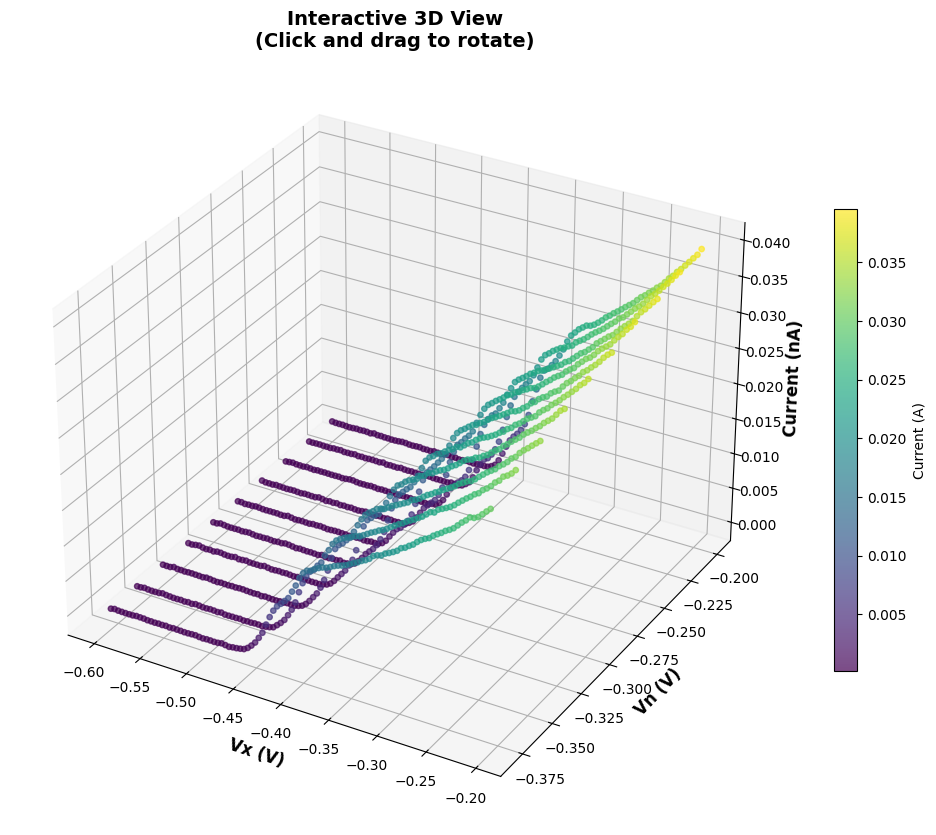

Data loaded successfully for 2D plot. Shape: (1000, 3)
2D contour plot saved as: I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216_2D_Contour.pdf


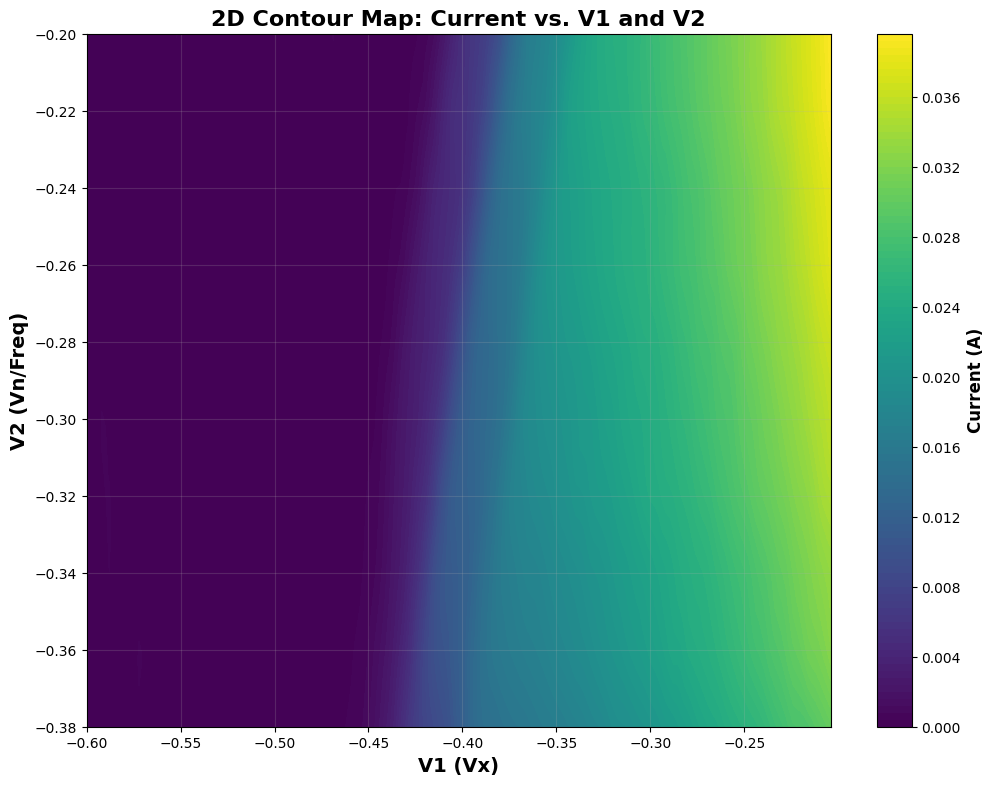

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D # Ensure Axes3D is imported
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter1d


def plot_voltage_sweep_data(filename='I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216.txt', save_pdf=True, pdf_filename=None):
    """
    Plot current vs V1 curves for various V2 values from the saved data file.
    
    Parameters:
    filename (str): Path to the data file
    save_pdf (bool): Whether to save the plot as PDF
    pdf_filename (str): Name of the PDF file (auto-generated if None)
    """
    
    # Read the data from file
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"File {filename} not found. Please check the file path.")
        return
    except Exception as e:
        print(f"Error reading file: {e}")
        return
    
    # Extract columns: V2, V1 (voltage), Current
    V2_values = data[:, 0]
    V1_values = data[:, 1]  
    currents = data[:, 2]
    
    # Group data by V2 values
    data_by_V2 = defaultdict(lambda: {'V1': [], 'current': []})
    
    for v2, v1, current in zip(V2_values, V1_values, currents):
        data_by_V2[v2]['V1'].append(v1)
        data_by_V2[v2]['current'].append(current)
    
    # Sort V2 keys for consistent plotting
    sorted_V2_keys = sorted(data_by_V2.keys())
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot each V2 curve
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_V2_keys)))
    
    for i, v2 in enumerate(sorted_V2_keys):
        V1_sorted = np.array(data_by_V2[v2]['V1'])
        current_sorted = np.array(data_by_V2[v2]['current'])
        
        # Sort by V1 to ensure proper line plotting
        sort_indices = np.argsort(V1_sorted)
        V1_sorted = V1_sorted[sort_indices]
        current_sorted = current_sorted[sort_indices]
        
        plt.plot(V1_sorted, current_sorted, '-o', 
                color=colors[i], 
                label=f'V2 = {v2:.2f} V',
                markersize=4,
                linewidth=1.5)
    
    # Formatting
    plt.xlabel('V1 (V)', fontsize=12)
    plt.ylabel('Current (A)', fontsize=12)
    plt.title('Current vs V1 for Various V2 Values', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    # Save as PDF if requested
    if save_pdf:
        if pdf_filename is None:
            # Auto-generate filename based on data filename
            base_name = filename.replace('.txt', '').replace('.dat', '')
            pdf_filename = f"{base_name}_plot.pdf"
        
        plt.savefig(pdf_filename, format='pdf', dpi=300, bbox_inches='tight')
        print(f"Plot saved as: {pdf_filename}")
    
    # Show statistics
    print(f"Number of V2 values: {len(sorted_V2_keys)}")
    print(f"V2 range: {min(sorted_V2_keys):.3f} V to {max(sorted_V2_keys):.3f} V")
    print(f"V1 range: {min(V1_values):.3f} V to {max(V1_values):.3f} V")
    print(f"Current range: {min(currents):.6e} A to {max(currents):.6e} A")
    
    plt.show()
    
    return data_by_V2




def plot_3d_surface(filename='I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216.txt', 
                   save_pdf=False, elevation=30, azimuth=45, save_multiple_views=False):
    """
    Create a 3D surface plot of the data with controllable view angles
    
    Parameters:
    filename (str): Path to data file
    save_pdf (bool): Whether to save the plot as PDF
    elevation (float): Elevation angle in degrees (vertical viewing angle, 0-90)
    azimuth (float): Azimuth angle in degrees (horizontal rotation, 0-360)
    save_multiple_views (bool): Whether to save multiple predefined views
    """

    
    try:
        #data = np.loadtxt(filename, delimiter=',', skiprows=1)
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except ValueError:
        try:
            data = np.loadtxt(filename, delimiter=',', comments='#')
            print(f"Data loaded with comments handling. Shape: {data.shape}")
        except:
            try:
                data = np.loadtxt(filename)
                print(f"Data loaded with default settings. Shape: {data.shape}")
            except:
                print("Could not load data for 3D plot")
                return
    except:
        print("Could not load data for 3D plot")
        return
    
    V2_values = data[:, 0]  # Second parameter (e.g., V2, Frequency, etc.)
    V1_values = data[:, 1]  # First parameter (e.g., V1, Voltage)
    currents = data[:, 2]   # Measured current
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot
    scatter = ax.scatter(V1_values, V2_values, currents, 
                        c=currents, cmap='viridis', s=15, alpha=0.7)
    
    # Set labels and title
    ax.set_xlabel('Vx (V)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Vn (V)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Current (nA)', fontsize=12, fontweight='bold')
    ax.set_title('3D View: Current vs Vx and Vn', fontsize=14, fontweight='bold')
    
    # Set the view angle
    ax.view_init(elev=elevation, azim=azimuth)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, shrink=0.6, aspect=20, label='Current (A)')
    cbar.ax.tick_params(labelsize=10)
    
    # Add grid for better visualization
    ax.grid(True, alpha=0.3)
    
    # Print current view angles
    print(f"Current view: Elevation = {elevation}°, Azimuth = {azimuth}°")
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_3D_elev{elevation}_azim{azimuth}.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        print(f"3D plot saved as: {pdf_filename}")
    
    plt.tight_layout()
    plt.show()
    
    # Optionally save multiple preset views
    if save_multiple_views:
        save_preset_views(filename, data)

def save_preset_views(filename, data):
    """
    Save multiple preset viewing angles for comprehensive visualization
    """
    # Define preset view angles (elevation, azimuth, description)
    preset_views = [
        (30, 45, "default"),
        (60, 30, "high_angle"),
        (15, 60, "low_angle"),
        (45, 0, "front_view"),
        (45, 90, "side_view"),
        (90, 0, "top_view"),
        (0, 0, "edge_view")
    ]
    
    base_name = filename.replace('.txt', '').replace('.dat', '')
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    for elev, azim, description in preset_views:
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        
        scatter = ax.scatter(V1_values, V2_values, currents, 
                            c=currents, cmap='viridis', s=15, alpha=0.7)
        
        ax.set_xlabel('Vx (V)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Vn (V)', fontsize=12, fontweight='bold')
        ax.set_zlabel('Current (nA)', fontsize=12, fontweight='bold')
        ax.set_title(f'3D View: {description.replace("_", " ").title()}\n'
                    f'(Elevation: {elev}°, Azimuth: {azim}°)', 
                    fontsize=14, fontweight='bold')
        
        ax.view_init(elev=elev, azim=azim)
        ax.grid(True, alpha=0.3)
        
        plt.colorbar(scatter, shrink=0.6, aspect=20, label='Current (A)')
        
        pdf_filename = f"{base_name}_3D_{description}.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        plt.close()
        
        print(f"Saved view: {pdf_filename}")

def plot_interactive_3d(filename='I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216.txt'):
    """
    Create an interactive 3D plot where you can manually adjust the view
    """
    try:
        #data = np.loadtxt(filename, delimiter=',', skiprows=1)
        data = np.loadtxt(filename)
    except:
        try:
            data = np.loadtxt(filename, delimiter=',', comments='#')
        except:
            try:
                data = np.loadtxt(filename)
            except:
                print("Could not load data for interactive 3D plot")
                return
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(V1_values, V2_values, currents, 
                        c=currents, cmap='viridis', s=15, alpha=0.7)
    
    ax.set_xlabel('Vx (V)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Vn (V)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Current (nA)', fontsize=12, fontweight='bold')
    ax.set_title('Interactive 3D View\n(Click and drag to rotate)', 
                fontsize=14, fontweight='bold')
    
    plt.colorbar(scatter, shrink=0.6, aspect=20, label='Current (A)')
    ax.grid(True, alpha=0.3)
    
    print("Interactive plot created. Click and drag to rotate the view!")
    print("Use mouse wheel to zoom in/out")
    
    plt.show()



def plot_2d_contour(filename='I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216.txt', 
                    save_pdf=True, grid_points=200):
    """
    Creates a 2D contour plot (density map) from 3-column data.

    Parameters:
    filename (str): Path to the data file.
    save_pdf (bool): Whether to save the plot as a PDF.
    grid_points (int): The resolution of the interpolation grid for a smoother plot.
    """
    try:
        # Load data, assuming comma-separated values
        #data = np.loadtxt(filename, delimiter=',')
        data = np.loadtxt(filename)
        print(f"Data loaded successfully for 2D plot. Shape: {data.shape}")
    except Exception as e:
        print(f"Could not load data for 2D plot: {e}")
        return

    # Extract data columns
    v2_values = data[:, 0]
    v1_values = data[:, 1]
    currents = data[:, 2]

    # Create a regular grid to interpolate onto
    grid_v1 = np.linspace(v1_values.min(), v1_values.max(), grid_points)
    grid_v2 = np.linspace(v2_values.min(), v2_values.max(), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)

    # Interpolate the scattered data onto the regular grid
    # 'cubic' interpolation gives a smooth finish
    grid_currents = griddata((v1_values, v2_values), currents, (grid_v1, grid_v2), method='cubic')

    # --- Create the Plot ---
    plt.figure(figsize=(12, 9))

    # Create the filled contour plot (density map)
    # The 'levels' argument determines how many color steps to show
    contour = plt.contourf(grid_v1, grid_v2, grid_currents, levels=100, cmap='viridis')

    # Add a color bar to show the current scale
    cbar = plt.colorbar(contour)
    cbar.set_label('Current (A)', fontsize=12, fontweight='bold')

    # Add labels and a title
    plt.xlabel('V1 (Vx)', fontsize=14, fontweight='bold')
    plt.ylabel('V2 (Vn/Freq)', fontsize=14, fontweight='bold')
    plt.title('2D Contour Map: Current vs. V1 and V2', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.2)
    
    # Save the figure if requested
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_2D_Contour.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=300, bbox_inches='tight')
        print(f"2D contour plot saved as: {pdf_filename}")

    plt.show()



def plot_2d_derivative_contour(filename='I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216.txt',
                               save_pdf=True, 
                               grid_points=200, 
                               smoothing_sigma=1.5):
    """
    Calculates the derivative dI/dVx and creates a 2D contour map (conductance map).

    Parameters:
    filename (str): Path to the data file.
    save_pdf (bool): Whether to save the plot as a PDF.
    grid_points (int): The resolution of the interpolation grid for a smoother plot.
    smoothing_sigma (float): The standard deviation for the Gaussian filter used to 
                             smooth the data before taking the derivative.
    """
    try:
        # Load data using spaces as the default delimiter
        data = np.loadtxt(filename)
        print(f"Data loaded successfully for derivative map. Shape: {data.shape}")
    except Exception as e:
        print(f"Could not load data: {e}")
        return

    # Extract original data columns
    v2_col = data[:, 0]
    v1_col = data[:, 1]
    current_col = data[:, 2]

    # --- Step 1: Calculate the derivative for each V2 sweep ---
    
    # Group data by each unique V2 value
    data_by_v2 = defaultdict(list)
    for v2, v1, current in zip(v2_col, v1_col, current_col):
        data_by_v2[v2].append((v1, current))

    # Store the new derivative data points here
    all_v1 = []
    all_v2 = []
    all_didv1 = []

    for v2 in sorted(data_by_v2.keys()):
        # Unzip and sort the data points for the current V2 sweep
        points = sorted(data_by_v2[v2])
        v1_sweep = np.array([p[0] for p in points])
        current_sweep = np.array([p[1] for p in points])

        if len(v1_sweep) > 2:
            # Smooth the current data to reduce noise before differentiation
            current_smooth = gaussian_filter1d(current_sweep, sigma=smoothing_sigma)
            
            # Calculate the derivative dI/dV1 (conductance)
            didv1 = np.gradient(current_smooth, v1_sweep)
            
            # Add the results to our lists for the final map
            all_v1.extend(v1_sweep)
            all_v2.extend([v2] * len(v1_sweep))
            all_didv1.extend(didv1)

    # --- Step 2: Create the contour map from the derivative data ---
    
    # Create a regular grid to interpolate the derivative data onto
    grid_v1 = np.linspace(min(all_v1), max(all_v1), grid_points)
    grid_v2 = np.linspace(min(all_v2), max(all_v2), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)

    # Interpolate the scattered derivative data (V1, V2, dI/dV1) onto the grid
    grid_didv1 = griddata((all_v1, all_v2), all_didv1, (grid_v1, grid_v2), method='cubic')

    # --- Step 3: Plot the results ---
    plt.figure(figsize=(12, 9))

    # Create the filled contour plot
    contour = plt.contourf(grid_v1, grid_v2, grid_didv1, levels=100, cmap='inferno')

    # Add a color bar
    cbar = plt.colorbar(contour)
    cbar.set_label('Conductance dI/dVx (S)', fontsize=12, fontweight='bold')

    # Add labels and a title
    plt.xlabel('V1 (Vx)', fontsize=14, fontweight='bold')
    plt.ylabel('V2 (Vn)', fontsize=14, fontweight='bold')
    plt.title('2D Conductance Map (dI/dVx)', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.2)
    
    # Save the figure if requested
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_dIdVx_Contour.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=300, bbox_inches='tight')
        print(f"Derivative contour plot saved as: {pdf_filename}")

    plt.show()

def analyze_data_statistics(filename='I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216.txt'):
    """
    Print detailed statistics about the measurement data
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for analysis")
        return
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    print("=== Data Analysis ===")
    print(f"Total data points: {len(data)}")
    print(f"Unique V2 values: {len(np.unique(V2_values))}")
    print(f"V2 values: {np.unique(V2_values)}")
    print(f"V1 range: {np.min(V1_values):.3f} to {np.max(V1_values):.3f} V")
    print(f"Current statistics:")
    print(f"  Mean: {np.mean(currents):.6e} A")
    print(f"  Std:  {np.std(currents):.6e} A")
    print(f"  Min:  {np.min(currents):.6e} A")
    print(f"  Max:  {np.max(currents):.6e} A")

# if __name__ == "__main__":
#     # Main plotting function - saves PDF by default
#     data_dict = plot_voltage_sweep_data(save_pdf=True)
    
#     # Optional: Show statistics
#     analyze_data_statistics()
    
#     # Optional: Create 3D plot and save as PDF (uncomment if desired)
#     plot_3d_surface(save_pdf=True)
    
#     print("\nPlotting complete! PDF file has been saved.")


# Example usage functions
if __name__ == "__main__":
    filename = 'I-Vx-Vn_0x1Vp_0Vs_MUXon_50MHz0dBm_2509171216.txt'
    
    # Single view with custom angles
    print("Creating 3D plot with custom view angle...")
    plot_3d_surface(filename, elevation=45, azimuth=60, save_pdf=True)
    
    # Multiple preset views
    print("\nCreating multiple preset views...")
    plot_3d_surface(filename, save_multiple_views=True)
    
    # Interactive plot
    print("\nCreating interactive 3D plot...")
    plot_interactive_3d(filename)

    #contour plot
    plot_2d_contour(filename)

    # Call the new function to create the conductance map
    plot_2d_derivative_contour(filename, smoothing_sigma=1.5)